In [1]:
import numpy as np
import pandas as pd
import os 
import tqdm
import itertools

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from Bio.PDB import *
from difflib import SequenceMatcher


import ast

In [2]:
from sklearn.cluster import DBSCAN


In [3]:
df = pd.read_csv('df.csv')   

In [5]:
len_array = [len(list(ast.literal_eval(item))) for item in list(df["SEQRES (dict)"])]

In [6]:
max_len = max(len_array)

In [131]:
def convert_aa(aa_list, max_L):
    
    flag = True
    aa_converted = []
    
    amino_acids_list = "ALA CYS ASP GLU PHE GLY HIS ILE LYS LEU MET ASN PRO GLN ARG SER THR VAL TRP TYR SEC MSE".split()
    amino_acids_dict = {amino_acids_list[i]: i + 1 for i in range(0, len(amino_acids_list))}
    
    for item in aa_list:
        if item in amino_acids_list:
            aa_converted.append(amino_acids_dict[item])
        else:
            aa_converted = []
            flag = False
            
    if len(aa_converted) < max_L:
        for _ in range (max_L - len(aa_converted)):
            aa_converted.append(0)
   
    #print(len(aa_converted))
    return aa_converted, flag

In [132]:
data = []
count = 0

for data_seqres in list(df["SEQRES (dict)"]):
    aa_, flag = convert_aa(list(ast.literal_eval(data_seqres).values()), max_len)
    if flag: 
        data.append(np.array(aa_))
    else:  
        count +=1

In [133]:
print("N of invalid SEQRES:", count)

N of invalid SEQRES: 306


In [162]:
np.array(data)

array([[18, 10, 16, ...,  0,  0,  0],
       [18, 10, 16, ...,  0,  0,  0],
       [18, 10, 16, ...,  0,  0,  0],
       ...,
       [11,  8,  4, ...,  0,  0,  0],
       [22,  7,  7, ...,  0,  0,  0],
       [11, 17,  4, ...,  0,  0,  0]])

In [134]:
np.array(data).shape

(4696, 500)

In [101]:
tsne = TSNE(random_state=17)
dbscan = DBSCAN()

In [135]:
X_tsne = tsne.fit_transform(np.array(data))

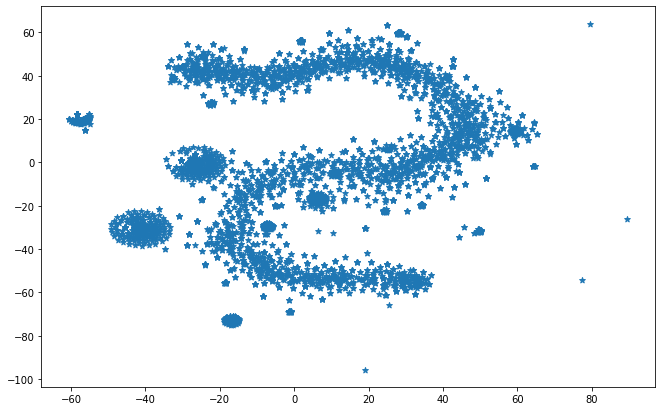

In [147]:
x_axis = X_tsne[:, 0]
y_axis = X_tsne[:, 1]

plt.figure(figsize=(11,7))
plt.scatter(x_axis, y_axis, marker='*' )
plt.show()

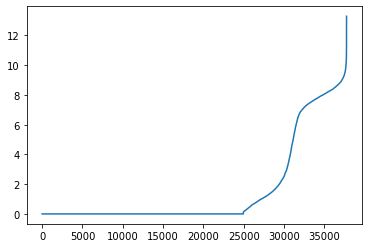

In [21]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(dist_matrix)
distances, indices = neighbors_fit.kneighbors(dist_matrix)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Normal attempt

In [4]:
df_unpr = pd.read_csv("uniprot.csv")
df_unpr = df_unpr.drop(['Unnamed: 0'], axis=1)
filenames = df_unpr['Filename'].tolist()
print(filenames)

['pdb101m.ent', 'pdb102l.ent', 'pdb102m.ent', 'pdb103l.ent', 'pdb103m.ent', 'pdb104m.ent', 'pdb105m.ent', 'pdb106m.ent', 'pdb107l.ent', 'pdb107m.ent', 'pdb108l.ent', 'pdb108m.ent', 'pdb109l.ent', 'pdb109m.ent', 'pdb110l.ent', 'pdb110m.ent', 'pdb111l.ent', 'pdb111m.ent', 'pdb112l.ent', 'pdb112m.ent', 'pdb113l.ent', 'pdb114l.ent', 'pdb115l.ent', 'pdb118l.ent', 'pdb119l.ent', 'pdb120l.ent', 'pdb121p.ent', 'pdb122l.ent', 'pdb123l.ent', 'pdb125l.ent', 'pdb126l.ent', 'pdb127l.ent', 'pdb128l.ent', 'pdb129l.ent', 'pdb12ca.ent', 'pdb130l.ent', 'pdb131l.ent', 'pdb138l.ent', 'pdb139l.ent', 'pdb140l.ent', 'pdb141l.ent', 'pdb142l.ent', 'pdb143l.ent', 'pdb144l.ent', 'pdb145l.ent', 'pdb146l.ent', 'pdb147l.ent', 'pdb149l.ent', 'pdb151l.ent', 'pdb152l.ent', 'pdb153l.ent', 'pdb154l.ent', 'pdb155l.ent', 'pdb156l.ent', 'pdb157l.ent', 'pdb158l.ent', 'pdb159l.ent', 'pdb160l.ent', 'pdb161l.ent', 'pdb162l.ent', 'pdb163l.ent', 'pdb164l.ent', 'pdb165l.ent', 'pdb166l.ent', 'pdb16pk.ent', 'pdb16vp.ent', 'pdb170l.

In [5]:
dist_matrix = np.load('dist_matrix.npy')

In [16]:
eps_list = [(i)*0.1  + 0.5 for i in range(3, 21)]
eps_list

[0.8,
 0.9,
 1.0,
 1.1,
 1.2000000000000002,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7000000000000002,
 1.8,
 1.9000000000000001,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4000000000000004,
 2.5]

In [10]:
counter_list

Counter({0: 37746})

In [17]:
from sklearn.cluster import DBSCAN
from collections import Counter

eps_list = [(i)*0.1  + 0.5 for i in range(3, 21)]

N_classes = []
 
for eps in eps_list:
    clustering = DBSCAN(metric='precomputed', eps=eps)
    clustering.fit(dist_matrix)
    clust = clustering.labels_
    counter_list = Counter(clust)
    N_classes.append(counter_list[-1] + len(counter_list) - 1)
    print("Eps done: ", eps, " |  N_classes: ", N_classes[-1])

Eps done:  0.8  |  N_classes:  14299
Eps done:  0.9  |  N_classes:  14155
Eps done:  1.0  |  N_classes:  13974
Eps done:  1.1  |  N_classes:  13763
Eps done:  1.2000000000000002  |  N_classes:  13511
Eps done:  1.3  |  N_classes:  13191
Eps done:  1.4  |  N_classes:  12606
Eps done:  1.5  |  N_classes:  11087
Eps done:  1.6  |  N_classes:  7094
Eps done:  1.7000000000000002  |  N_classes:  653
Eps done:  1.8  |  N_classes:  27
Eps done:  1.9000000000000001  |  N_classes:  27
Eps done:  2.0  |  N_classes:  0
Eps done:  2.1  |  N_classes:  0
Eps done:  2.2  |  N_classes:  0
Eps done:  2.3  |  N_classes:  0
Eps done:  2.4000000000000004  |  N_classes:  0
Eps done:  2.5  |  N_classes:  0


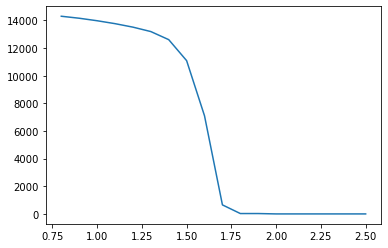

In [18]:
plt.plot(eps_list, N_classes)

In [98]:
eps = 0.75
clustering = DBSCAN(metric='precomputed', eps=eps)
clustering.fit(dist_matrix)
clust = clustering.labels_

In [99]:
N_classes= []
counter_list = Counter(clust)
N_classes.append(counter_list[-1] + len(counter_list) - 1)
print("Eps done: ", eps, " |  N_classes: ", N_classes[-1])

Eps done:  0.75  |  N_classes:  14345


In [100]:
dict_labels = { filenames[i] : clust[i] for i in range(0, len(clust) ) }

In [101]:
df_clust = pd.DataFrame(dict_labels.items(), columns=['Filename', 'Cluster'])
df_clust.to_csv('df_clust.csv')
df_clust= pd.read_csv('df_clust.csv')
clust = df_clust['Cluster'].tolist()
dict_clust = Counter(clust)
print(len(dict_clust))
print(dict_clust)

1309
Counter({-1: 13037, 3: 895, 234: 712, 1: 618, 79: 434, 0: 396, 32: 323, 1031: 312, 69: 295, 106: 282, 870: 278, 20: 249, 148: 248, 548: 238, 621: 209, 274: 202, 8: 199, 2: 156, 242: 156, 36: 143, 412: 143, 253: 141, 416: 139, 607: 130, 432: 123, 351: 122, 68: 117, 417: 115, 446: 112, 705: 99, 85: 96, 175: 93, 584: 92, 617: 88, 40: 87, 56: 86, 177: 85, 65: 83, 1027: 80, 327: 79, 247: 76, 193: 75, 215: 75, 630: 74, 420: 73, 508: 73, 83: 72, 531: 72, 644: 72, 48: 71, 129: 70, 135: 69, 614: 65, 283: 64, 886: 64, 87: 63, 507: 63, 34: 62, 116: 62, 822: 62, 149: 61, 788: 60, 550: 58, 255: 57, 328: 57, 918: 56, 454: 55, 155: 53, 369: 53, 443: 53, 603: 53, 802: 53, 1160: 53, 355: 52, 77: 51, 232: 51, 250: 51, 76: 50, 126: 50, 377: 49, 717: 49, 795: 48, 101: 47, 192: 46, 652: 46, 676: 46, 223: 45, 379: 45, 1233: 45, 31: 44, 337: 44, 198: 43, 526: 43, 641: 42, 45: 41, 197: 41, 445: 41, 947: 41, 1260: 41, 481: 40, 1078: 40, 117: 39, 891: 39, 1043: 39, 1194: 38, 93: 37, 134: 37, 393: 37, 1231:

In [95]:
eps_list = [0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 1.0, 1.1, 1.2, 1.25, 1.3, 1.4, 1.5]
N_clusters_list = [1295, 1296, 1308, 1309, 1303, 1303, 1301, 1300, 1292, 1285, 1284, 1271, 1239, 1072]
N_unique = [13361, 13215, 13086, 13037, 12997, 12885, 12675, 12496, 12472, 12227, 12083, 11921, 11368, 10016]
N_proteins_list = [5*n for n in N_clusters_list]

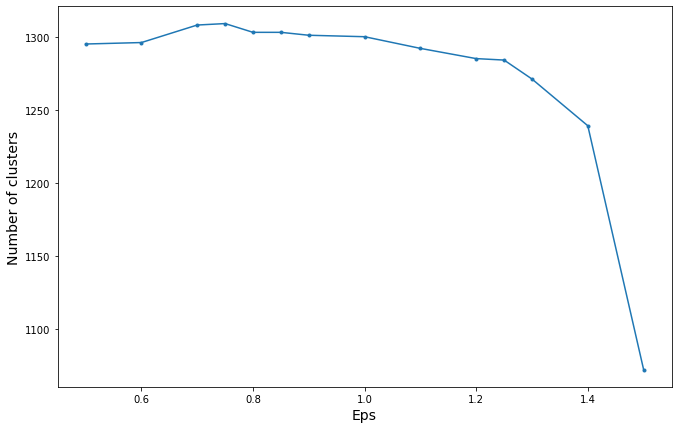

In [96]:

plt.figure(figsize=(11,7))
plt.plot(eps_list, N_clusters_list, '.-') 
plt.xlabel('Eps', fontsize = 14)
plt.ylabel('Number of clusters', fontsize = 14)

plt.show()

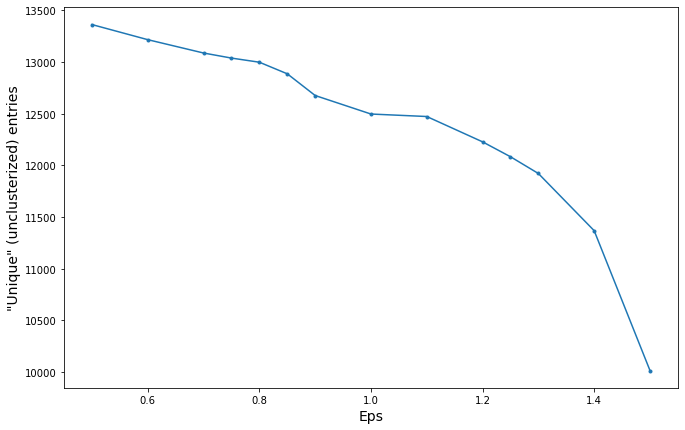

In [97]:

plt.figure(figsize=(11,7))
plt.plot(eps_list, N_unique, '.-') 
plt.xlabel('Eps', fontsize = 14)
plt.ylabel('"Unique" (unclusterized) entries', fontsize = 14)

plt.show()

## Non-unique

In [6]:
df_clust= pd.read_csv('df_clust.csv')

In [7]:
from Bio import SeqIO
from random import seed, randint, sample, choice
from itertools import combinations 
from Bio.pairwise2 import format_alignment
from Bio import pairwise2

seed(1234)

In [8]:
def compute_seqid_1_list(file_list):

    res = list(combinations(file_list, 2))
    res_dict = {}
    
    for files in res:
        str_list = []
        for file in files:
            PDB_file_path = './PDBs/' + file
            chain = {record.id: record.seq for record in SeqIO.parse(PDB_file_path, 'pdb-seqres')}
            str_list.append(str(list(chain.values())[0]))
        
        score = pairwise2.align.globalxx(str_list[0], str_list[1], score_only = True)
        res_dict[files] =  score / max(len(str_list[0]), len(str_list[1])) * 100 
     
    return res_dict

def compute_seqid_2_lists(list_1, list_2):

    pairs = itertools.product(list_1, list_2)
    res_dict = {}
    
    result = [pair for pair in pairs if pair[0] != pair[1]]
    str_list = []
    for files in result:
        for file in files:
            PDB_file_path = './PDBs/' + file
            chain = {record.id: record.seq for record in SeqIO.parse(PDB_file_path, 'pdb-seqres')}
            str_list.append(str(list(chain.values())[0]))
        
        score = pairwise2.align.globalxx(str_list[0], str_list[1], score_only = True)
        res_dict[files] =  score / max(len(str_list[0]), len(str_list[1])) * 100 
     
    return res_dict

In [9]:
N = 300
n = 1307
fname_list = []
idx_list = []
list_dict_1_list = []

for i in range(N):
    
    idx = randint(0, n)
    idx_list.append(idx)
    f_names = list(df_clust[df_clust["Cluster"] == idx]['Filename'])
    f_names = sample(f_names, k=5)
    
    dict_1_list = compute_seqid_1_list(f_names)
    
    list_dict_1_list.append(dict_1_list)
    fname_list.append(f_names)

In [10]:
LoL = []

for j, items in enumerate(list_dict_1_list):
    LoL.append(list(items.values()))

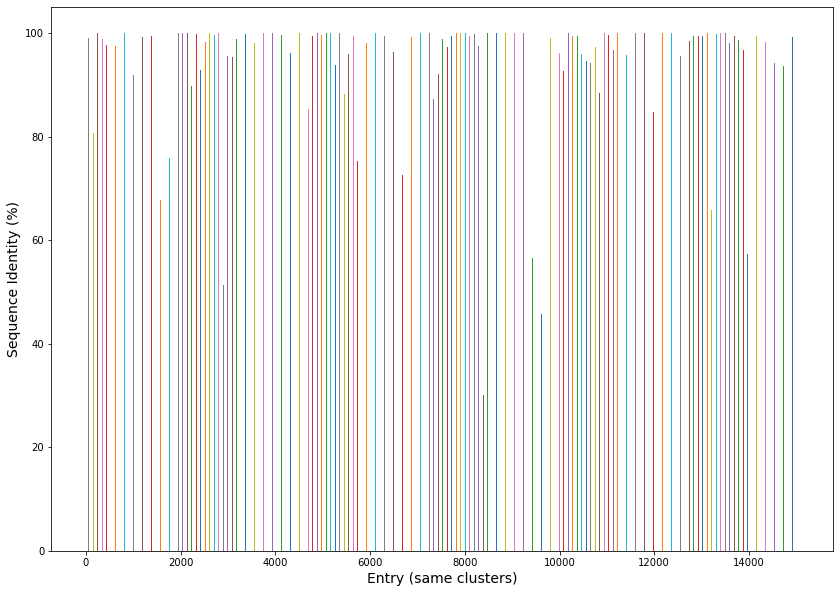

In [11]:
plt.figure(figsize=(14,10))

i = 0
l = 0

for LoLs in LoL:
    i += 10 
    
    for k, item in enumerate(LoLs):
        l += 4
        k += 5
        plt.bar(k + i + l, item)
        
plt.xlabel('Entry (same clusters)', fontsize = 14)
plt.ylabel('Sequence Identity (%)', fontsize = 14)

plt.show()


In [12]:
pairs = list(combinations(fname_list, 2))
list_dict_2_list = []
for pair in pairs:
    dict_2_list = compute_seqid_2_lists(pair[0], pair[1])
    list_dict_2_list.append(dict_2_list)

KeyboardInterrupt: 

In [13]:
LoL2 = []
for j, items in enumerate(list_dict_2_list):
    LoL2.append(list(items.values()))

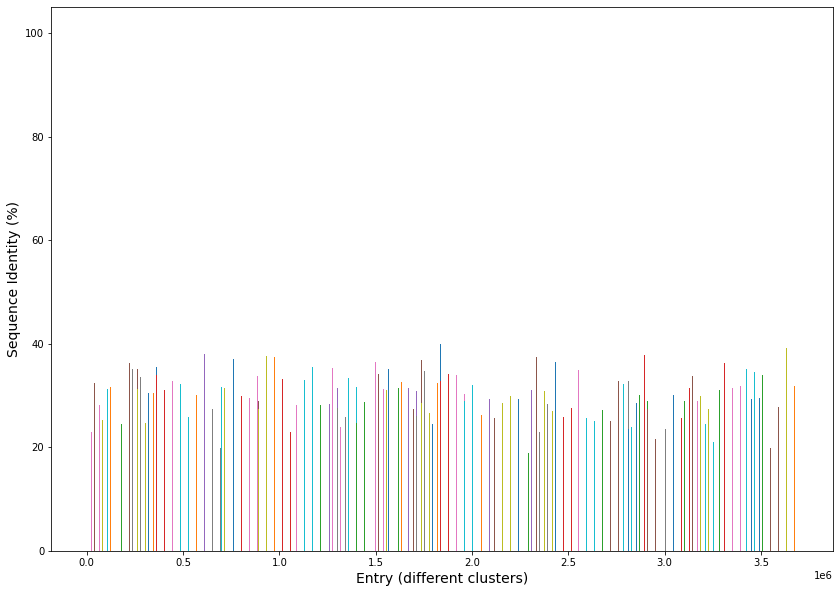

In [14]:
plt.figure(figsize=(14,10))

i = 0
l = 0

for LoLs in LoL2:
    i += 10 
    
    for k, item in enumerate(LoLs):
        l += 4
        k += 5
        plt.bar(k + i + l, item)
        
plt.xlabel('Entry (different clusters)', fontsize = 14)
plt.ylabel('Sequence Identity (%)', fontsize = 14)

plt.show()

## Unique

In [15]:
f_names_unique = list(df_clust[df_clust["Cluster"] == -1]['Filename'])
print(len(f_names_unique))

13037


In [ ]:
f_names_sample = sample(f_names_unique, k=800)
dict_unique_1 = compute_seqid_1_list(f_names_sample)

In [ ]:
plt.figure(figsize=(14,10))
i = 0
for k, item in enumerate(list(dict_unique_1.values())):
    i += 1
    plt.bar(k + i + 5, item)
    
plt.xlabel('Entry (same clusters among unique)', fontsize = 14)
plt.ylabel('Sequence Identity (%)', fontsize = 14)

plt.show()

In [249]:
N = 20
n = 1307
fname_list_2 = []

for i in range(N):
    
    idx = randint(0, n)
    idx_list.append(idx)
    f_names = list(df_clust[df_clust["Cluster"] == idx]['Filename'])
    f_names = choice(f_names)

    fname_list_2.append(f_names)

In [260]:
dict_2_list_unique = compute_seqid_2_lists(f_names_sample, fname_list_2)

In [270]:
dict_2_list_unique

{('pdb6sus.ent', 'pdb1a45.ent'): 13.484375000000009,
 ('pdb6sus.ent', 'pdb5g2r.ent'): 13.484375000000009,
 ('pdb6sus.ent', 'pdb1cjw.ent'): 13.484375000000009,
 ('pdb6sus.ent', 'pdb2xk6.ent'): 13.484375000000009,
 ('pdb6sus.ent', 'pdb1abe.ent'): 13.484375000000009,
 ('pdb6sus.ent', 'pdb4aa5.ent'): 13.484375000000009,
 ('pdb6sus.ent', 'pdb6t1i.ent'): 13.484375000000009,
 ('pdb6sus.ent', 'pdb6joq.ent'): 13.484375000000009,
 ('pdb6sus.ent', 'pdb1gkx.ent'): 13.484375000000009,
 ('pdb6sus.ent', 'pdb5vw9.ent'): 13.484375000000009,
 ('pdb6sus.ent', 'pdb1od1.ent'): 13.484375000000009,
 ('pdb6sus.ent', 'pdb5k1m.ent'): 13.484375000000009,
 ('pdb6sus.ent', 'pdb1raj.ent'): 13.484375000000009,
 ('pdb6sus.ent', 'pdb5ov5.ent'): 13.484375000000009,
 ('pdb6sus.ent', 'pdb1oc7.ent'): 13.484375000000009,
 ('pdb6sus.ent', 'pdb1cvl.ent'): 13.484375000000009,
 ('pdb6sus.ent', 'pdb5del.ent'): 13.484375000000009,
 ('pdb6sus.ent', 'pdb3n0h.ent'): 13.484375000000009,
 ('pdb6sus.ent', 'pdb4qup.ent'): 13.4843750000

In [266]:
LoL3 = []
for j, items in enumerate(list(dict_2_list_unique.values())):
    LoL3.append(items)

In [268]:
LoLs

13.484375000000009

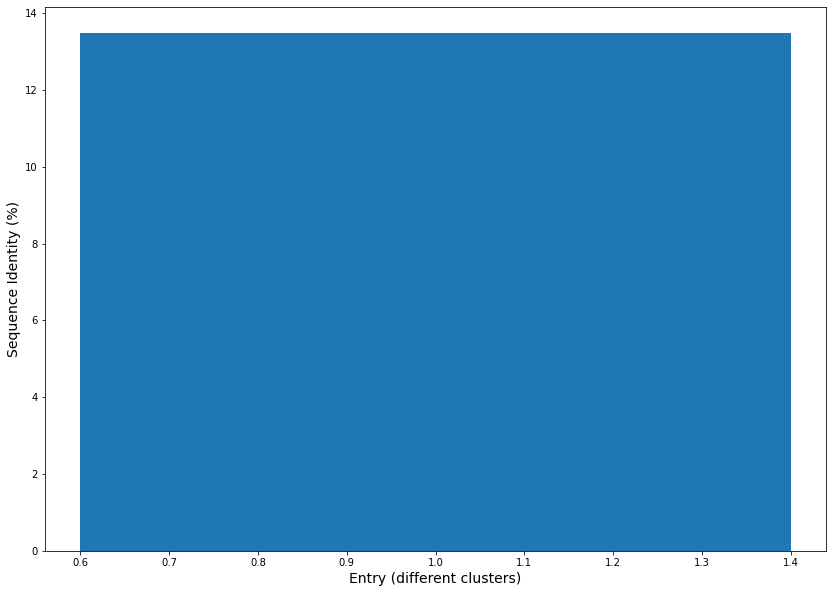

In [269]:
plt.figure(figsize=(14,10))

plt.bar(1, LoLs)
        
plt.xlabel('Entry (different clusters)', fontsize = 14)
plt.ylabel('Sequence Identity (%)', fontsize = 14)

plt.show()

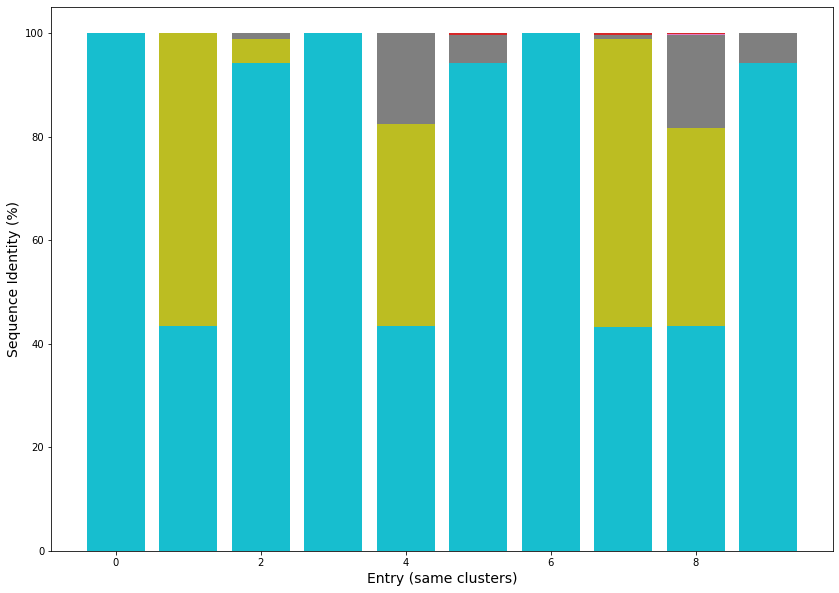

In [280]:
plt.figure(figsize=(14,10))

i = 0
l = 0

for LoLs in LoL:
    plt.bar(np.arange(len(LoLs)), LoLs)
        
plt.xlabel('Entry (same clusters)', fontsize = 14)
plt.ylabel('Sequence Identity (%)', fontsize = 14)

plt.show()
